In [1]:
# Based on https://www.kaggle.com/benhamner/d/uciml/iris/python-data-visualizations/notebook
# First, we'll import pandas, a data processing and CSV file I/O library
import pandas as pd
import numpy as np

# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

# Next, we'll load the train and test dataset, which is in the "../input/" directory
train = pd.read_csv("train.csv") # the train dataset is now a Pandas DataFrame
test = pd.read_csv("test.csv") # the test dataset is now a Pandas DataFrame

%pylab inline
# Let's see what's in the trainings data - Jupyter notebooks print the result of the last thing you do
train.head()

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [2]:
# 116 values in column var3 are -999999
# var3 is suspected to be the nationality of the customer
# -999999 would mean that the nationality of the customer is unknown
train.loc[train.var3==-999999].shape

(116, 371)

In [3]:
# Replace -999999 in var3 column with most common value 2 
# See https://www.kaggle.com/cast42/santander-customer-satisfaction/debugging-var3-999999
# for details
train = train.replace(-999999,2)
train.loc[train.var3==-999999].shape

(0, 371)

In [4]:
# var38 is important according to XGBOOST
# see https://www.kaggle.com/cast42/santander-customer-satisfaction/xgboost-with-early-stopping/files
# Also RFC thinks var38 is important
# see https://www.kaggle.com/tks0123456789/santander-customer-satisfaction/data-exploration/notebook
# so far I have not seen a guess what var38 may be about
train.var38.describe()

count    7.602000e+04
mean     1.172358e+05
std      1.826646e+05
min      5.163750e+03
25%      6.787061e+04
50%      1.064092e+05
75%      1.187563e+05
max      2.203474e+07
Name: var38, dtype: float64

In [5]:
# How is var38 looking when customer is unhappy ?
train.loc[train['TARGET']==1, 'var38'].describe()

count    3.008000e+03
mean     9.967828e+04
std      1.063098e+05
min      1.113663e+04
25%      5.716094e+04
50%      8.621997e+04
75%      1.173110e+05
max      3.988595e+06
Name: var38, dtype: float64

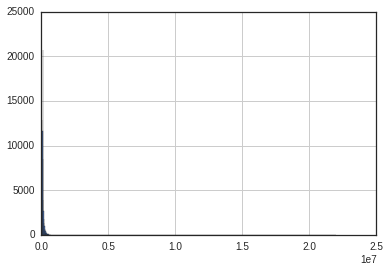

In [6]:
# Histogram for var 38 is not normal distributed
train.var38.hist(bins=1000)

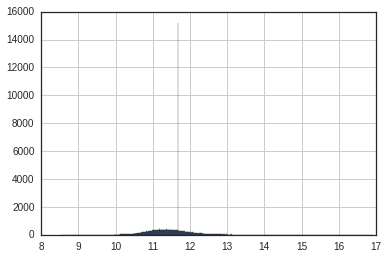

In [7]:
train.var38.map(np.log).hist(bins=1000)

In [8]:
# where is the spike between 11 and 12  in the log plot ?
train.var38.map(np.log).mode()

0    11.672584
dtype: float64

In [9]:
# What are the most common values for var38 ?
train.var38.value_counts()

117310.979016    14868
451931.220000       16
463625.160000       12
288997.440000       11
104563.800000       11
236690.340000        8
104644.410000        7
125722.440000        7
329603.970000        7
128318.520000        7
67088.310000         7
100466.730000        6
105260.880000        6
163432.470000        6
168733.620000        6
70813.800000         6
185385.690000        6
97639.560000         6
227397.720000        5
229351.650000        5
185784.720000        5
93037.680000         5
171932.700000        5
121603.020000        5
71302.530000         5
208961.790000        5
33184.020000         5
235476.720000        5
53324.460000         5
63820.890000         5
                 ...  
60641.190000         1
116348.850000        1
260050.500000        1
138685.650000        1
259491.210000        1
38497.500000         1
169253.910000        1
53706.630000         1
124985.760000        1
122917.860000        1
63206.880000         1
119542.260000        1
144531.9900

In [10]:
# what is we exclude the most common value
train.loc[~np.isclose(train.var38, 117310.979016), 'var38'].value_counts()

451931.22    16
463625.16    12
288997.44    11
104563.80    11
236690.34     8
125722.44     7
67088.31      7
329603.97     7
128318.52     7
104644.41     7
168733.62     6
105260.88     6
70813.80      6
185385.69     6
100466.73     6
97639.56      6
163432.47     6
85814.04      5
227397.72     5
185784.72     5
53324.46      5
63820.89      5
121603.02     5
235476.72     5
276030.57     5
229351.65     5
71302.53      5
148781.16     5
127141.50     5
83174.28      5
             ..
78575.76      1
92559.15      1
213357.09     1
86544.00      1
69771.57      1
93040.41      1
101787.87     1
29253.36      1
78572.79      1
117020.22     1
163871.28     1
135987.99     1
42972.66      1
98882.58      1
86197.11      1
88632.51      1
147800.49     1
34231.14      1
57845.01      1
118496.31     1
76820.16      1
48498.87      1
34952.10      1
203976.78     1
177303.66     1
115873.29     1
194914.29     1
26466.60      1
58412.37      1
19546.50      1
Name: var38, dtype: int6

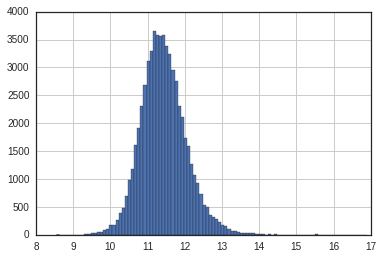

In [11]:
# Look at the distribution
train.loc[~np.isclose(train.var38, 117310.979016), 'var38'].map(np.log).hist(bins=100)

In [12]:
# Above plot suggest we split up var38 into two variables
# var38mc == 1 when var38 has the most common value and 0 otherwise
# logvar38 is log transformed feature when var38mc is 0, zero otherwise
train['var38mc'] = np.isclose(train.var38, 117310.979016)
train['logvar38'] = train.loc[~train['var38mc'], 'var38'].map(np.log)
train.loc[train['var38mc'], 'logvar38'] = 0

In [13]:
#Check for nan's
print('Number of nan in var38mc', train['var38mc'].isnull().sum())
print('Number of nan in logvar38',train['logvar38'].isnull().sum())

('Number of nan in var38mc', 0)
('Number of nan in logvar38', 0)


In [14]:
train['var15'].describe()

count    76020.000000
mean        33.212865
std         12.956486
min          5.000000
25%         23.000000
50%         28.000000
75%         40.000000
max        105.000000
Name: var15, dtype: float64

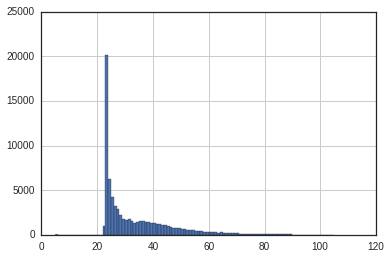

In [15]:
#Looks more normal, plot the histogram
train['var15'].hist(bins=100)

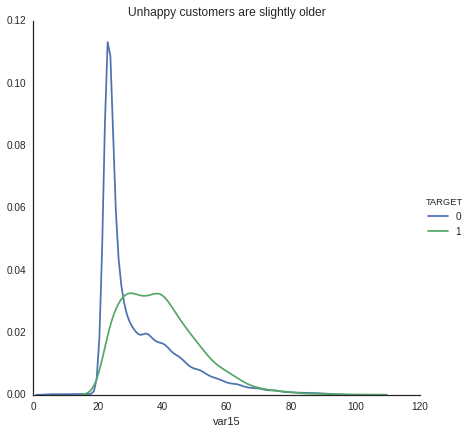

In [16]:
# Let's look at the density of the age of happy/unhappy customers
sns.FacetGrid(train, hue="TARGET", size=6) \
   .map(sns.kdeplot, "var15") \
   .add_legend()
plt.title('Unhappy customers are slightly older')
plt.show()

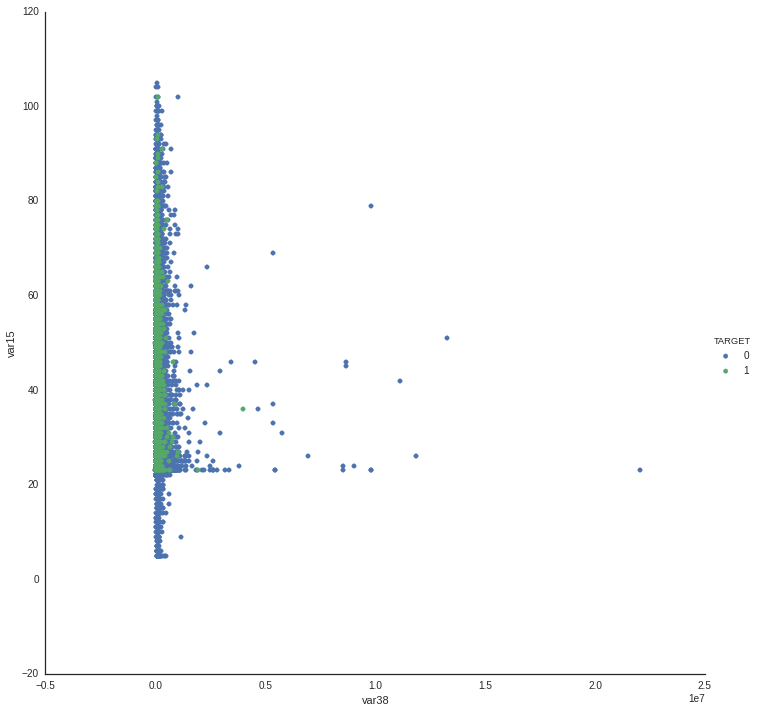

In [17]:
sns.FacetGrid(train, hue="TARGET", size=10) \
   .map(plt.scatter, "var38", "var15") \
   .add_legend()

(0, 120)

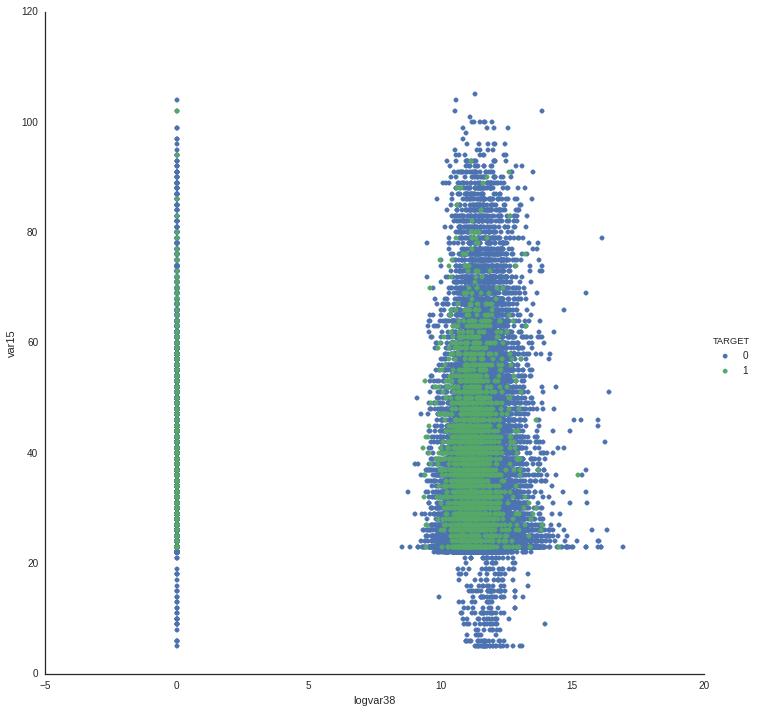

In [18]:
sns.FacetGrid(train, hue="TARGET", size=10) \
   .map(plt.scatter, "logvar38", "var15") \
   .add_legend()
plt.ylim([0,120]) # Age must be positive ;-)

(0, 120)

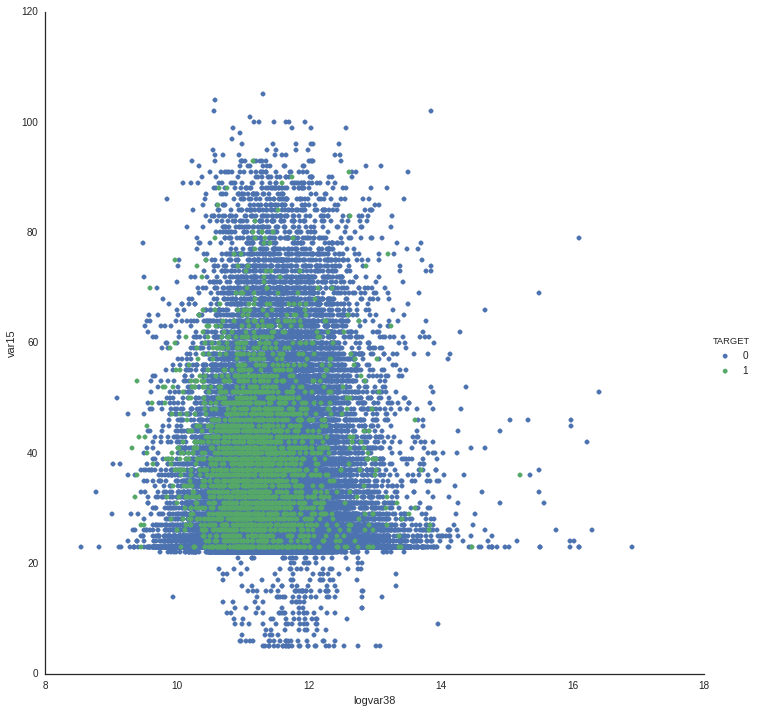

In [19]:
# Exclude most common value for var38 
sns.FacetGrid(train[~train.var38mc], hue="TARGET", size=10) \
   .map(plt.scatter, "logvar38", "var15") \
   .add_legend()
plt.ylim([0,120])

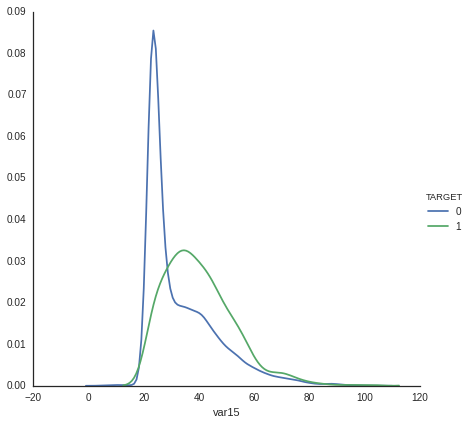

In [20]:
# What is distribution of the age when var38 has it's most common value ?
sns.FacetGrid(train[train.var38mc], hue="TARGET", size=6) \
   .map(sns.kdeplot, "var15") \
   .add_legend()

In [21]:
X = train.iloc[:,:-1]
y = train.TARGET

from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif,chi2
from sklearn.preprocessing import Binarizer, scale

# First select features based on chi2 and f_classif
p = 3

X_bin = Binarizer().fit_transform(scale(X))
selectChi2 = SelectPercentile(chi2, percentile=p).fit(X_bin, y)
selectF_classif = SelectPercentile(f_classif, percentile=p).fit(X, y)

chi2_selected = selectChi2.get_support()
chi2_selected_features = [ f for i,f in enumerate(X.columns) if chi2_selected[i]]
print('Chi2 selected {} features {}.'.format(chi2_selected.sum(),
   chi2_selected_features))
f_classif_selected = selectF_classif.get_support()
f_classif_selected_features = [ f for i,f in enumerate(X.columns) if f_classif_selected[i]]
print('F_classif selected {} features {}.'.format(f_classif_selected.sum(),
   f_classif_selected_features))
selected = chi2_selected & f_classif_selected
print('Chi2 & F_classif selected {} features'.format(selected.sum()))
features = [ f for f,s in zip(X.columns, selected) if s]
print (features)

Chi2 selected 12 features ['var15', 'ind_var5', 'ind_var8_0', 'ind_var30', 'num_var5', 'num_var8_0', 'num_var30', 'num_var42', 'saldo_var30', 'var36', 'num_meses_var5_ult3', 'TARGET'].
F_classif selected 12 features ['var15', 'ind_var5', 'ind_var8_0', 'ind_var30', 'num_var4', 'num_var5', 'num_var30', 'num_var35', 'num_var42', 'var36', 'num_meses_var5_ult3', 'TARGET'].
Chi2 & F_classif selected 10 features
['var15', 'ind_var5', 'ind_var8_0', 'ind_var30', 'num_var5', 'num_var30', 'num_var42', 'var36', 'num_meses_var5_ult3', 'TARGET']


In [22]:
# Make a dataframe with the selected features and the target variable
X_sel = train[features+['TARGET']]

In [23]:
# var38 (important for XGB and RFC is not selected but var36 is. Let's explore
X_sel['var36'].value_counts()

99    30064
3     22177
1     14664
2      8704
0       411
Name: var36, dtype: int64

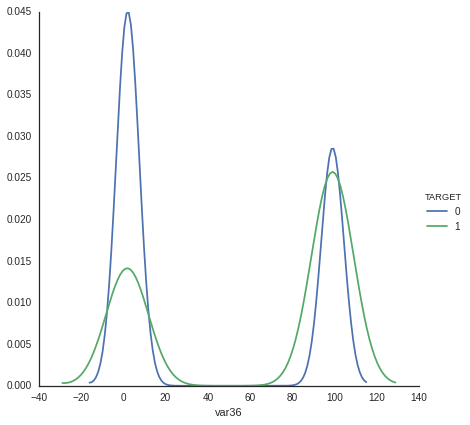

In [24]:
# Let's plot the density in function of the target variabele
sns.FacetGrid(train, hue="TARGET", size=6) \
   .map(sns.kdeplot, "var36") \
   .add_legend()

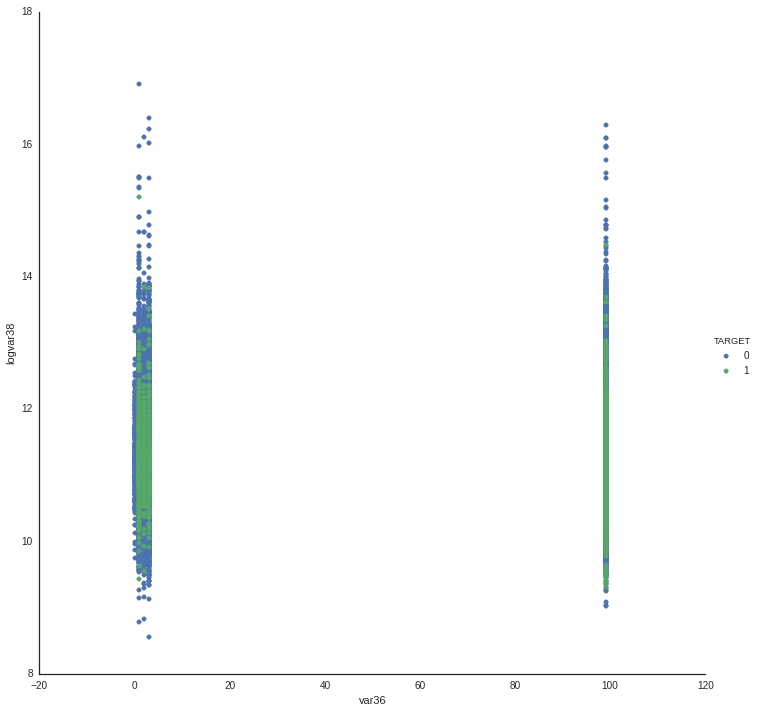

In [25]:
# var36 in function of var38 (most common value excluded) 
sns.FacetGrid(train[~train.var38mc], hue="TARGET", size=10) \
   .map(plt.scatter, "var36", "logvar38") \
   .add_legend()

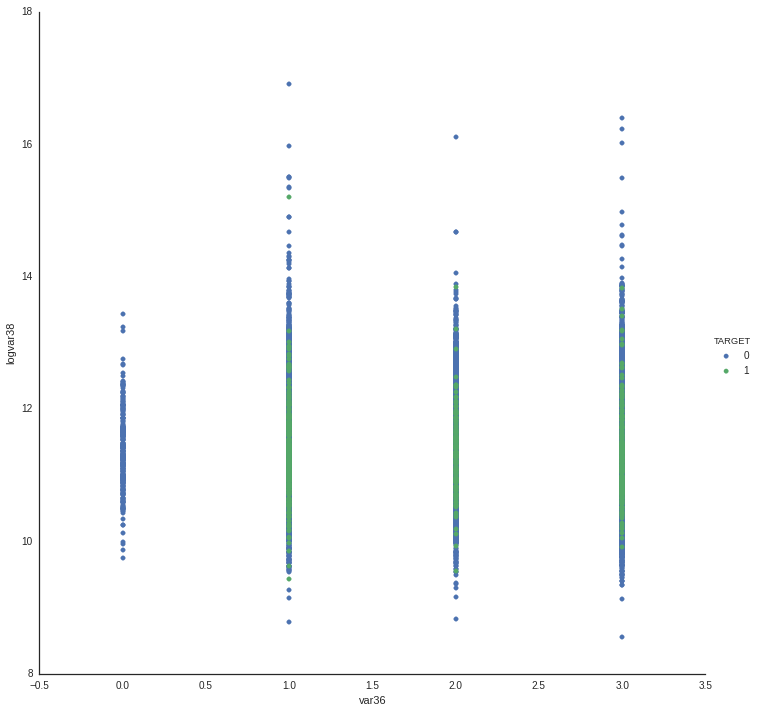

In [26]:
sns.FacetGrid(train[(~train.var38mc) & (train.var36 < 4)], hue="TARGET", size=10) \
   .map(plt.scatter, "var36", "logvar38") \
   .add_legend()

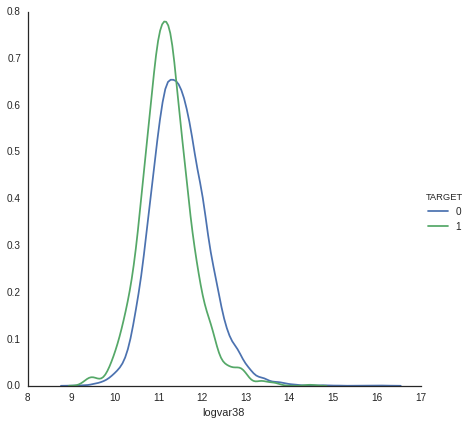

In [27]:
# Let's plot the density in function of the target variabele, when var36 = 99
sns.FacetGrid(train[(~train.var38mc) & (train.var36 ==99)], hue="TARGET", size=6) \
   .map(sns.kdeplot, "logvar38") \
   .add_legend()

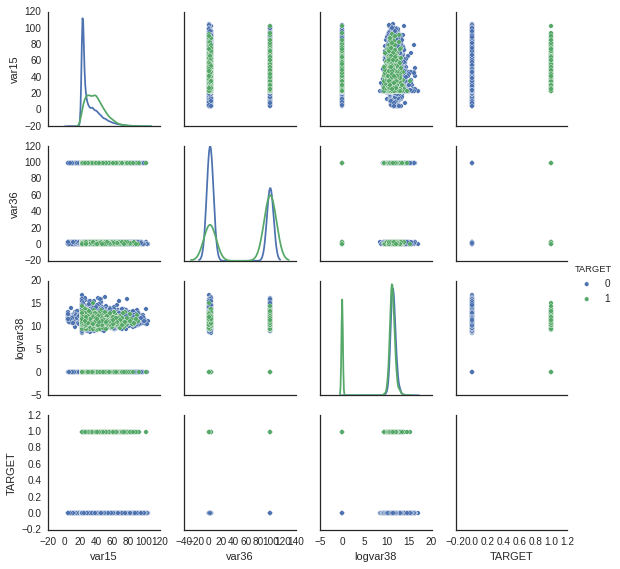

In [28]:
sns.pairplot(train[['var15','var36','logvar38','TARGET']], hue="TARGET", size=2, diag_kind="kde")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e6c627590>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f8e6c246250>]], dtype=object)

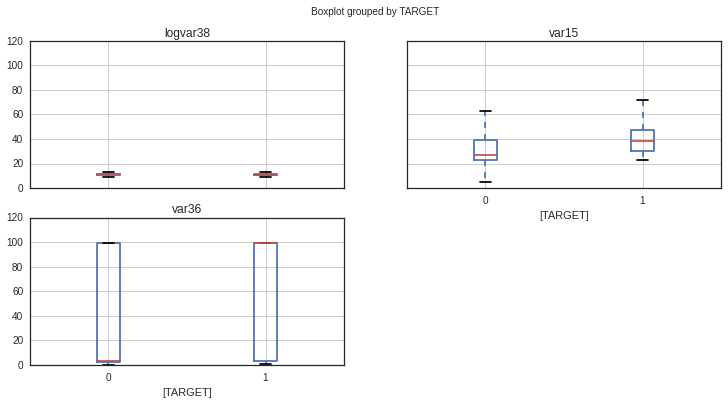

In [29]:
train[['var15','var36','logvar38','TARGET']].boxplot(by="TARGET", figsize=(12, 6))

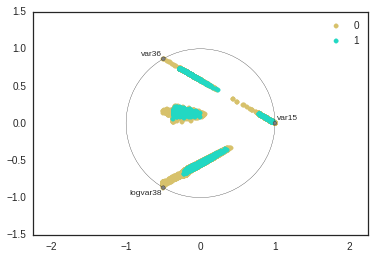

In [30]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
from pandas.tools.plotting import radviz
radviz(train[['var15','var36','logvar38','TARGET']], "TARGET")

In [31]:
features+['TARGET']

['var15',
 'ind_var5',
 'ind_var8_0',
 'ind_var30',
 'num_var5',
 'num_var30',
 'num_var42',
 'var36',
 'num_meses_var5_ult3',
 'TARGET',
 'TARGET']

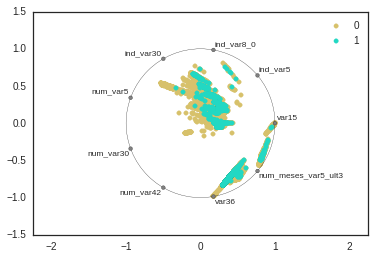

In [32]:
radviz(train[features], "TARGET")

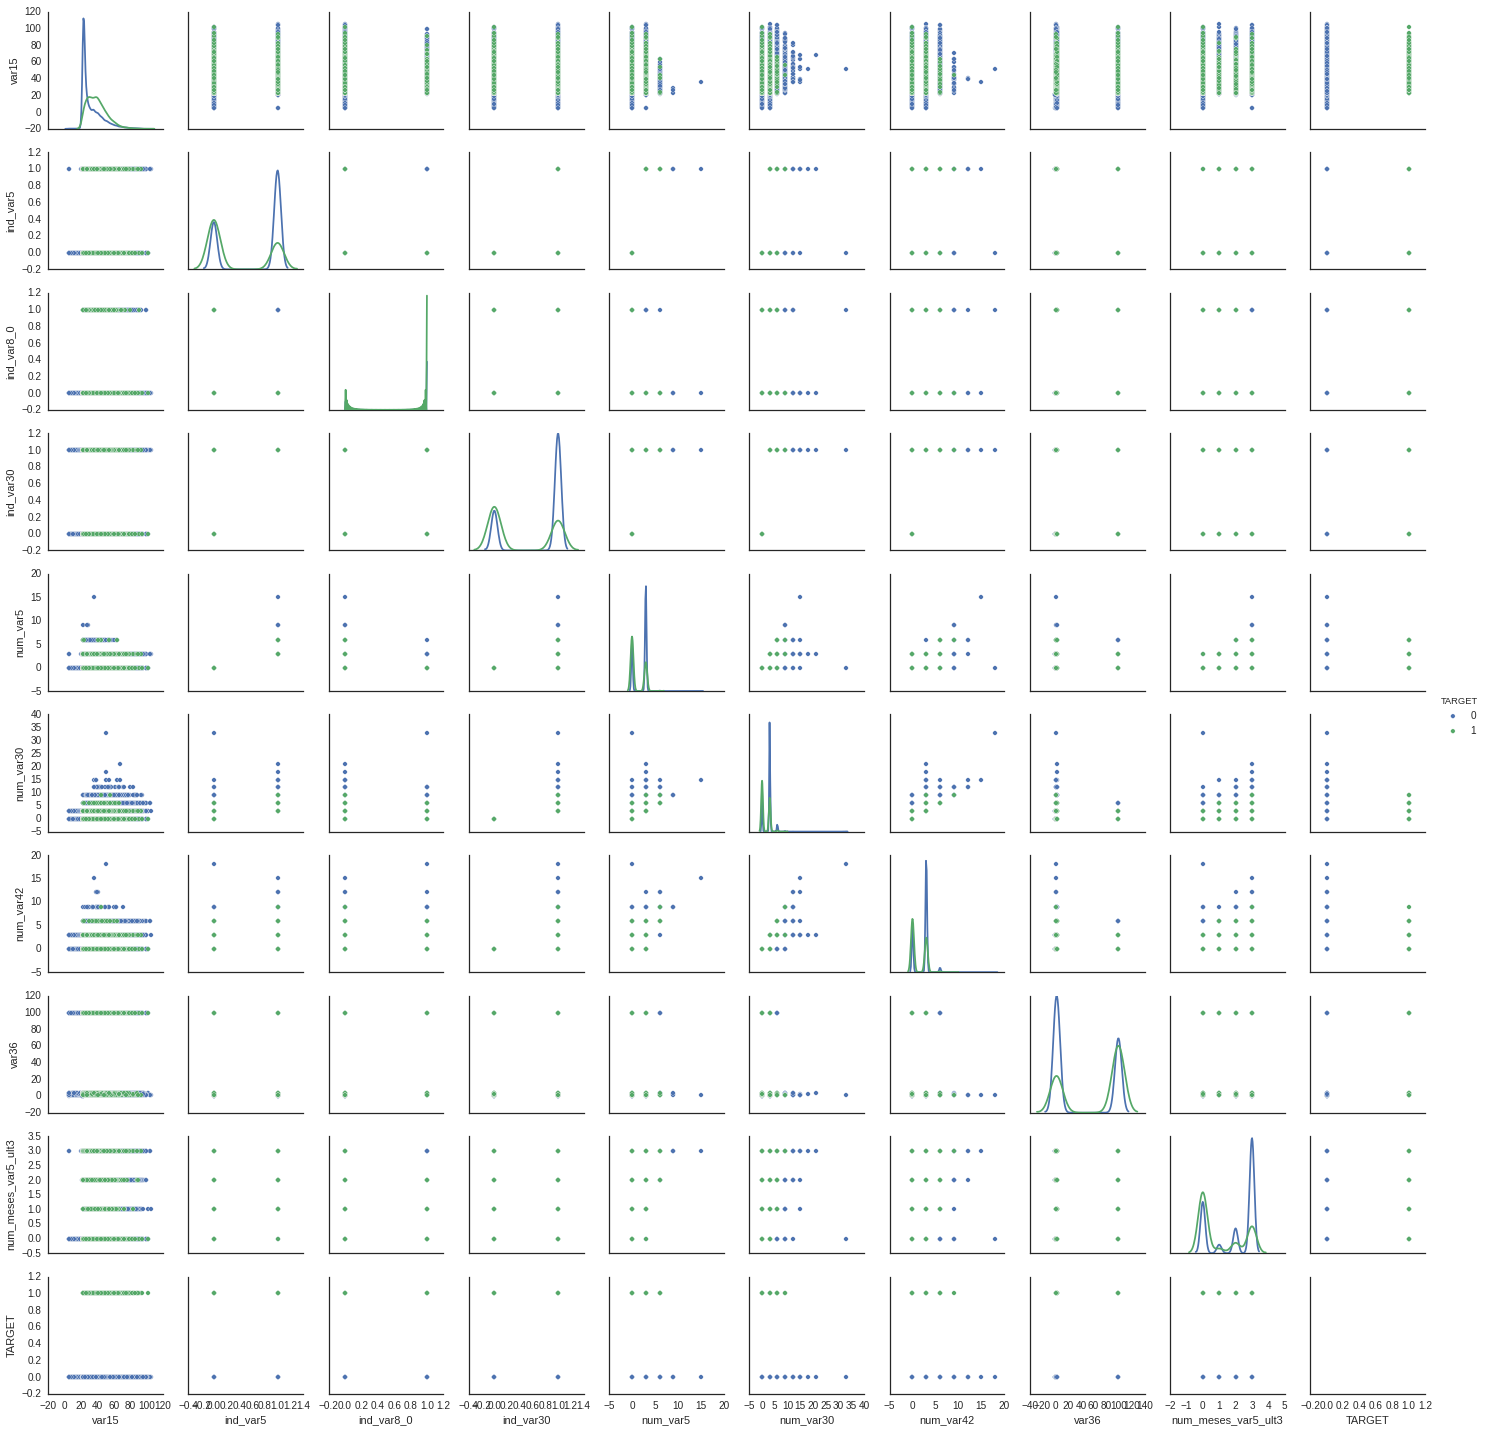

In [33]:
# this compares features pairwise and looks at the distribution of said features for each target value, 1 and 0
sns.pairplot(train[features], hue="TARGET", size=2, diag_kind="kde")

In [34]:
train[features]

,var15,ind_var5,ind_var8_0,ind_var30,num_var5,num_var30,num_var42,var36,num_meses_var5_ult3,TARGET
0,23,0,0,0,0,0,0,99,0,0
1,34,0,0,1,0,3,0,3,1,0
2,23,1,0,1,3,3,3,99,3,0
3,37,1,0,1,3,3,3,2,2,0
4,39,0,0,1,0,3,3,1,3,0
5,23,0,0,0,0,0,0,99,0,0
6,27,1,0,1,3,3,3,3,3,0
7,26,1,0,1,3,3,3,2,2,0
8,45,0,0,0,0,0,0,99,0,0
9,25,1,0,1,3,3,3,2,2,0


In [38]:
# final check for NaNs
train[features].isnull().sum()

var15                  0
ind_var5               0
ind_var8_0             0
ind_var30              0
num_var5               0
num_var30              0
num_var42              0
var36                  0
num_meses_var5_ult3    0
TARGET                 0
dtype: int64

In [39]:
test = pd.read_csv("test.csv") # the test dataset is now a Pandas DataFrame

# Combining Features Efficiently
Some machine learning techniques, such as Neural Networks, can combine features intelligently on their own. With this competition, however, the class imbalance is apparently rendering NNs difficult to use, so we can instead try to combine them ourselves. The following is taken from a script: https://www.kaggle.com/selfishgene/santander-customer-satisfaction/advanced-feature-exploration

In [40]:
from sklearn import cluster
from sklearn import ensemble
from sklearn import cross_validation
from sklearn.metrics import roc_auc_score as auc
import time

plt.rcParams['figure.figsize'] = (10, 10)

#%% load data and remove constant and duplicate columns  (taken from a kaggle script)

trainDataFrame = pd.read_csv('train.csv')

# remove constant columns
colsToRemove = []
for col in trainDataFrame.columns:
    if trainDataFrame[col].std() == 0:
        colsToRemove.append(col)

trainDataFrame.drop(colsToRemove, axis=1, inplace=True)

# remove duplicate columns
colsToRemove = []
columns = trainDataFrame.columns
for i in range(len(columns)-1):
    v = trainDataFrame[columns[i]].values
    for j in range(i+1,len(columns)):
        if np.array_equal(v,trainDataFrame[columns[j]].values):
            colsToRemove.append(columns[j])

trainDataFrame.drop(colsToRemove, axis=1, inplace=True)

trainLabels = trainDataFrame['TARGET']
trainFeatures = trainDataFrame.drop(['ID','TARGET'], axis=1)


#%% look at single feature performance

X_train, X_valid, y_train, y_valid = cross_validation.train_test_split(trainFeatures, trainLabels, 
                                                                       test_size=0.5, random_state=19683)
verySimpleLearner = ensemble.GradientBoostingClassifier(n_estimators=20, max_features=1, max_depth=3, 
                                                        min_samples_leaf=100, learning_rate=0.1, 
                                                        subsample=0.65, loss='deviance', random_state=1)

startTime = time.time()
singleFeatureTable = pd.DataFrame(index=range(len(X_train.columns)), columns=['feature','AUC'])
for k,feature in enumerate(X_train.columns):
    trainInputFeature = X_train[feature].values.reshape(-1,1)
    validInputFeature = X_valid[feature].values.reshape(-1,1)
    verySimpleLearner.fit(trainInputFeature, y_train)
    
    validAUC = auc(y_valid, verySimpleLearner.predict_proba(validInputFeature)[:,1])
    singleFeatureTable.ix[k,'feature'] = feature
    singleFeatureTable.ix[k,'AUC'] = validAUC
        
print("finished evaluating single features. took %.2f minutes" %((time.time()-startTime)/60))

finished evaluating single features. took 0.73 minutes


We can show the single feature Area Under Curve Performance

In [41]:
#%% sort according to AUC and present the table
singleFeatureTable = singleFeatureTable.sort_values(by='AUC', axis=0, ascending=False).reset_index(drop=True)

singleFeatureTable.ix[:15,:]

,feature,AUC
0,saldo_var30,0.717168
1,var15,0.711636
2,saldo_medio_var5_hace2,0.702386
3,saldo_var42,0.701937
4,num_var35,0.695905
5,num_var4,0.695669
6,saldo_medio_var5_ult1,0.693486
7,saldo_var5,0.69305
8,saldo_medio_var5_ult3,0.690776
9,num_meses_var5_ult3,0.68934


In [ ]:
#%% find interesting fivewise combinations

numFeaturesInCombination = 20
numCombinations = 3000
numBestSingleFeaturesToSelectFrom = 50

X_train, X_valid, y_train, y_valid = cross_validation.train_test_split(trainFeatures, trainLabels, 
                                                                       test_size=0.5, random_state=1)
weakLearner = ensemble.GradientBoostingClassifier(n_estimators=30, max_features=2, max_depth=3, 
                                                  min_samples_leaf=100,learning_rate=0.1, 
                                                  subsample=0.65, loss='deviance', random_state=1)

featuresToUse = singleFeatureTable.ix[0:numBestSingleFeaturesToSelectFrom-1,'feature']
featureColumnNames = ['feature'+str(x+1) for x in range(numFeaturesInCombination)]
featureCombinationsTable = pd.DataFrame(index=range(numCombinations), columns=featureColumnNames + ['combinedAUC'])

# for numCombinations iterations 
startTime = time.time()
for combination in range(numCombinations):
    # generate random feature combination
    randomSelectionOfFeatures = sorted(np.random.choice(len(featuresToUse), numFeaturesInCombination, replace=False))

    # store the feature names
    combinationFeatureNames = [featuresToUse[x] for x in randomSelectionOfFeatures]
    for i in range(len(randomSelectionOfFeatures)):
        featureCombinationsTable.ix[combination,featureColumnNames[i]] = combinationFeatureNames[i]

    # build features matrix to get the combination AUC
    trainInputFeatures = X_train.ix[:,combinationFeatureNames]
    validInputFeatures = X_valid.ix[:,combinationFeatureNames]
    # train learner
    weakLearner.fit(trainInputFeatures, y_train)
    # store AUC results
    validAUC = auc(y_valid, weakLearner.predict_proba(validInputFeatures)[:,1])        
    featureCombinationsTable.ix[combination,'combinedAUC'] = validAUC

validAUC = np.array(featureCombinationsTable.ix[:,'combinedAUC'])
print("(min,max) AUC = (%.4f,%.4f). took %.1f minutes" % (validAUC.min(),validAUC.max(), (time.time()-startTime)/60))

# show the histogram of the feature combinations performance 
plt.figure(); plt.hist(validAUC, 100, facecolor='blue', alpha=0.75)
plt.xlabel('AUC'); plt.ylabel('frequency'); plt.title('feature combination AUC histogram'); plt.show()

In [49]:
#%% sort according to combination AUC and look at the table

featureCombinationsTable = featureCombinationsTable.sort_values(by='combinedAUC', axis=0, ascending=False).reset_index(drop=True)
featureCombinationsTable.ix[:20,:]

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,combinedAUC
0,saldo_var30,var15,num_var4,saldo_medio_var5_ult3,var38,num_var45_hace2,num_var30_0,num_var45_ult1,num_med_var45_ult3,ind_var39_0,imp_op_var41_ult1,ind_var13_0,num_var42_0,num_var8_0,ind_var8_0,0.822632
1,saldo_var30,var15,saldo_var42,saldo_medio_var5_ult1,ind_var30,num_var42,num_var5,var36,var38,num_meses_var39_vig_ult3,num_var30_0,num_med_var45_ult3,ind_var41_0,imp_op_var41_ult1,num_var13,0.819588
2,saldo_var30,var15,num_var35,saldo_var5,saldo_medio_var5_ult3,num_meses_var5_ult3,saldo_medio_var5_hace3,var38,num_var45_hace2,imp_op_var39_ult1,imp_op_var41_ult1,ind_var12_0,num_var13_0,ind_var8_0,num_var45_hace3,0.81837
3,saldo_var30,var15,num_meses_var5_ult3,num_var5,var38,num_var45_hace2,num_var30_0,num_med_var45_ult3,imp_op_var39_ult1,imp_op_var41_ult1,ind_var12_0,ind_var13,num_var39_0,ind_var13_0,num_var42_0,0.818294
4,saldo_var30,var15,num_var4,saldo_medio_var5_ult1,saldo_medio_var5_ult3,num_meses_var5_ult3,ind_var30,var36,var38,num_var30_0,num_med_var45_ult3,imp_op_var41_ult1,ind_var12_0,num_var39_0,num_var13_0,0.818089
5,saldo_var30,var15,saldo_medio_var5_hace3,num_var42,num_var5,ind_var5,var36,var38,ind_var39_0,ind_var41_0,imp_op_var39_ult1,ind_var12_0,num_var41_0,ind_var13_0,num_var42_0,0.816664
6,saldo_var30,var15,num_var35,saldo_medio_var5_ult1,num_var30,num_var5,ind_var5,var38,num_med_var45_ult3,ind_var41_0,num_var12_0,ind_var12_0,ind_var13_0,num_var8_0,ind_var8_0,0.816653
7,saldo_var30,var15,saldo_var42,saldo_medio_var5_ult1,saldo_var5,num_meses_var5_ult3,num_var30,saldo_medio_var5_hace3,ind_var5,var36,var38,num_var45_ult1,num_var12_0,ind_var13_0,ind_var8_0,0.816133
8,saldo_var30,var15,num_var4,saldo_medio_var5_ult1,saldo_var5,num_meses_var5_ult3,num_var30,saldo_medio_var5_hace3,num_var5,ind_var5,var38,num_med_var45_ult3,ind_var39_0,ind_var41_0,num_var42_0,0.815894
9,saldo_var30,var15,num_var4,saldo_medio_var5_ult3,saldo_medio_var5_hace3,var38,num_var30_0,num_var45_ult1,ind_var41_0,imp_op_var39_ult1,num_var41_0,num_var39_0,ind_var13_0,num_var8_0,num_var45_hace3,0.815745


In [45]:
featureCombinationsTable

,feature1,feature2,feature3,feature4,feature5,combinedAUC
0,saldo_var30,var15,saldo_medio_var5_hace2,num_var4,var38,0.827457
1,saldo_var30,var15,num_var42,var36,var38,0.827196
2,saldo_var30,var15,saldo_var42,num_var35,var38,0.826616
3,saldo_var30,var15,num_var35,saldo_medio_var5_hace3,var38,0.82656
4,saldo_var30,var15,num_var4,saldo_var5,var38,0.826092
5,saldo_var30,var15,num_var4,ind_var30,var38,0.825976
6,saldo_var30,var15,num_var35,ind_var30,var38,0.82588
7,saldo_var30,var15,saldo_var42,var38,num_var45_hace2,0.824565
8,saldo_var30,var15,saldo_var42,var38,num_meses_var39_vig_ult3,0.823055
9,saldo_var30,var15,num_var4,num_var5,var36,0.819574


'0.17'